<a href="https://colab.research.google.com/github/vinnimichelin/Dataset_Modelagem_Dados/blob/main/Dataset_Modelagem_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

from datetime import date

In [3]:
df = pd.read_csv('Data.csv', sep=',')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
150692,549523,47566,PARTY BUNTING,5.0,4/8/2011 15:35,4.95,12748.0,United Kingdom
150693,549524,15036,ASSORTED COLOURS SILK FAN,1.0,4/8/2011 15:41,1.63,NaN,United Kingdom
150694,549524,15056BL,EDWARDIAN PARASOL BLACK,1.0,4/8/2011 15:41,12.46,NaN,United Kingdom
150695,549524,16235,RECYCLED PENCIL WITH RABBIT ERASER,9.0,4/8/2011 15:41,0.42,NaN,United Kingdom


In [4]:
#Descrição dos dados

df.describe()

,Quantity,UnitPrice,CustomerID
count,150696.000000,150696.000000,104165.000000
mean,9.037347,5.171674,15288.544242
std,275.690005,102.641183,1735.286455
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13848.000000
50%,3.000000,2.460000,15189.000000
75%,10.000000,4.210000,16871.000000
max,74215.000000,16888.020000,18283.000000


In [13]:
#Mostrando os dados nulos

df_null = (
    df.isna().sum()
    .to_frame('null_qntd')
    .join((df.isna().sum() / df.shape[0] * 100).to_frame('null_pct'))
    .sort_values('null_pct', ascending=False)
)

df_null

,null_qntd,null_pct
CustomerID,46532,30.877854
Description,624,0.414076
StockCode,1,0.000664
Quantity,1,0.000664
InvoiceDate,1,0.000664
UnitPrice,1,0.000664
Country,1,0.000664
InvoiceNo,0,0.000000


In [24]:
#Dropando os dados nulos

df_limpo = df.dropna()

In [17]:
#Dados duplicados

df.duplicated().sum()

1359

In [25]:
#Dropando os dados duplicados

df_limpo = df_limpo.drop_duplicates()

In [79]:
#Filtrando os dados maiores que zero

df_limpo = df_limpo.query('UnitPrice >= 0 and Quantity >= 0')

In [80]:
df_limpo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
150688,549522,22969,HOMEMADE JAM SCENTED CANDLES,24,2011-04-08 15:34:00,1.45,16873,United Kingdom
150689,549522,22489,PACK OF 12 TRADITIONAL CRAYONS,24,2011-04-08 15:34:00,0.42,16873,United Kingdom
150690,549523,22669,RED BABY BUNTING,1,2011-04-08 15:35:00,2.95,12748,United Kingdom
150691,549523,47566B,TEA TIME PARTY BUNTING,1,2011-04-08 15:35:00,4.95,12748,United Kingdom


In [81]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100230 entries, 0 to 150692
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    100230 non-null  object        
 1   StockCode    100230 non-null  object        
 2   Description  100230 non-null  object        
 3   Quantity     100230 non-null  int64         
 4   InvoiceDate  100230 non-null  datetime64[ns]
 5   UnitPrice    100230 non-null  float64       
 6   CustomerID   100230 non-null  int64         
 7   Country      100230 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.9+ MB


In [82]:
#Alterando o tipo dos dados

df_limpo = df_limpo.astype({
    'Quantity': int,
    'InvoiceDate': 'datetime64[ns]',
    'CustomerID': int
})

In [83]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100230 entries, 0 to 150692
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    100230 non-null  object        
 1   StockCode    100230 non-null  object        
 2   Description  100230 non-null  object        
 3   Quantity     100230 non-null  int64         
 4   InvoiceDate  100230 non-null  datetime64[ns]
 5   UnitPrice    100230 non-null  float64       
 6   CustomerID   100230 non-null  int64         
 7   Country      100230 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.9+ MB


(array([1, 2, 3]),
 [Text(1, 0, 'Quantity'), Text(2, 0, 'UnitPrice'), Text(3, 0, 'CustomerID')])

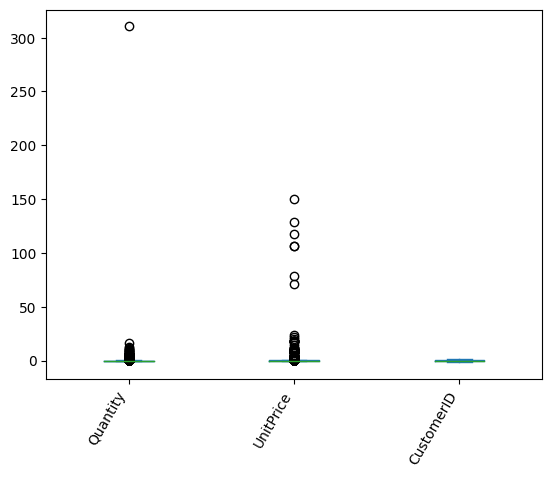

In [84]:
#Mostrando os outliers

df_limpo[['Quantity','UnitPrice','CustomerID']].apply(scale).plot.box()
plt.xticks(rotation=60, ha='right')

In [ ]:
#Removendo os valores de quantidade acima de 10.000 e as unidades maiores que 5.000

df_limpo = df_limpo.query('UnitPrice <= 5000 and Quantity <= 10000')

(array([1, 2, 3]),
 [Text(1, 0, 'Quantity'), Text(2, 0, 'UnitPrice'), Text(3, 0, 'CustomerID')])

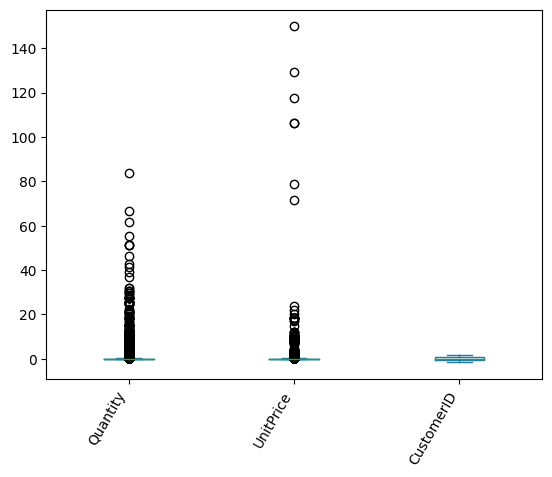

In [98]:
df_limpo[['Quantity','UnitPrice','CustomerID']].apply(scale).plot.box()
plt.xticks(rotation=60, ha='right')

In [99]:
#Criando a coluna de preço total

df_limpo['total_price'] = df_limpo['Quantity'] * df_limpo['UnitPrice']

In [100]:
df_limpo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
150688,549522,22969,HOMEMADE JAM SCENTED CANDLES,24,2011-04-08 15:34:00,1.45,16873,United Kingdom,34.80
150689,549522,22489,PACK OF 12 TRADITIONAL CRAYONS,24,2011-04-08 15:34:00,0.42,16873,United Kingdom,10.08
150690,549523,22669,RED BABY BUNTING,1,2011-04-08 15:35:00,2.95,12748,United Kingdom,2.95
150691,549523,47566B,TEA TIME PARTY BUNTING,1,2011-04-08 15:35:00,4.95,12748,United Kingdom,4.95


In [102]:
#Calculando a data da última compra

ultima_compra = df_limpo['InvoiceDate'].max()
ultima_compra

Timestamp('2011-04-08 15:35:00')

(0.0, 100000.0)

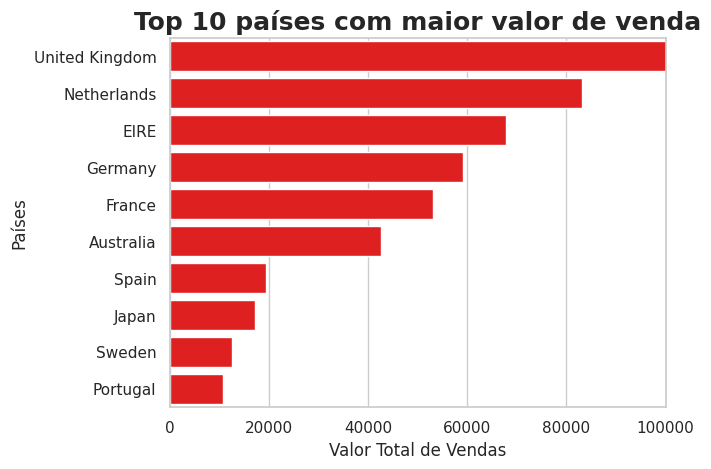

In [251]:
#Gerando os gráficos.

#Top 10 países com maior valor de vendas
df_venda_pais = df_limpo.groupby('Country')['total_price'].sum().reset_index().sort_values('total_price', ascending=False)
df_venda_pais = df_venda_pais.iloc[:10]

sns.barplot(data=df_venda_pais, y='Country', x='total_price', color='red', orient='h')
plt.title('Top 10 países com maior valor de venda', loc='center', fontsize=18, fontweight='bold')
plt.xlabel('Valor Total de Vendas')
plt.ylabel('Países')
plt.xlim(0,100000)

Text(0, 0.5, 'Produtos')

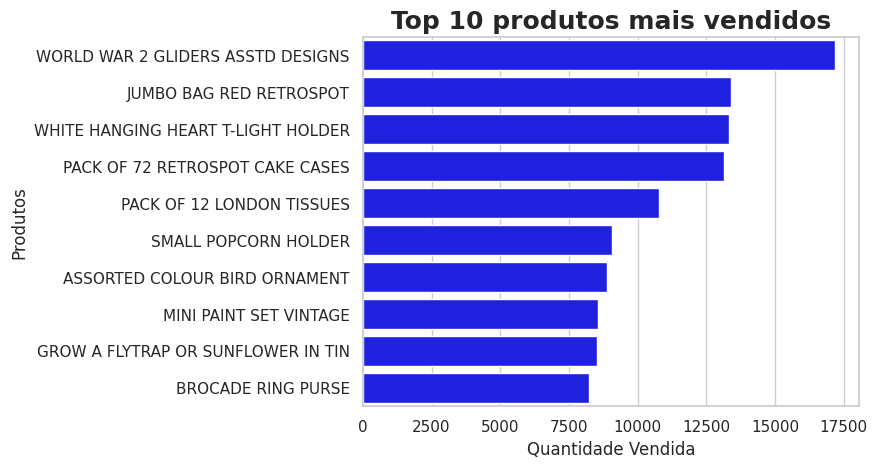

In [167]:
#Top 10 produtos mais vendidos

df_produtos_vendidos = df_limpo.groupby('Description')['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False)
df_produtos_vendidos = df_produtos_vendidos.iloc[:10]

sns.barplot(data=df_produtos_vendidos, y='Description', x='Quantity', orient='h', color='blue')
plt.title('Top 10 produtos mais vendidos', loc='center', fontsize=18, fontweight='bold')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produtos')

Text(0, 0.5, 'Valor de Vendas')

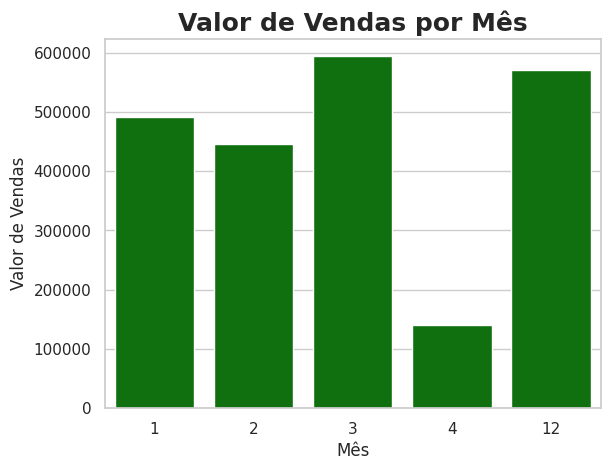

In [219]:
#Valor de vendas por mês

date_col = pd.DatetimeIndex(df_limpo['InvoiceDate'])
df_limpo['Month'] = date_col.month

df_vendas_mes = df_limpo.groupby(by=['Month'])['total_price'].sum().reset_index()

sns.barplot(data= df_vendas_mes, y='total_price', x='Month', color='green')
plt.title('Valor de Vendas por Mês', loc='center', fontsize=18, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Valor de Vendas')

In [282]:
#Calculando o RFM

# R

df_r = (
    df_limpo[['InvoiceDate','CustomerID']]
    .groupby('CustomerID')['InvoiceDate']
    .agg('max')
    .reset_index()
)

curr_time = df_r['InvoiceDate'].max()

def month_diff(curr_time,datetime_val):
  return 12 * (curr_time.year - datetime_val.year) + (curr_time.month - datetime_val.month )

df_r['Recency'] = df_r['InvoiceDate'].apply(lambda datetime_val:month_diff(curr_time, datetime_val))

df_r = df_r.drop('InvoiceDate', axis=1)


#Calculei a recência em meses, para melhor visualização

# F & M

df_f_m = (
    df_limpo.groupby('CustomerID')
    [['InvoiceNo','total_price']]
    .agg({'InvoiceNo':'count','total_price':'mean'})
    .reset_index()
)

df_f_m = df_f_m.rename(columns={'InvoiceNo':'Frequency', 'total_price':'Monetary'})

df_rfm = df_r.merge(df_f_m, on='CustomerID', how='left')
df_rfm = df_rfm.fillna(0)

df_rfm

,CustomerID,Recency,Frequency,Monetary
0,12347,0,84,21.707500
1,12348,0,28,53.115714
2,12350,2,17,19.670588
3,12352,1,38,41.100263
4,12356,0,57,48.299649
...,...,...,...,...
2230,18270,1,5,22.390000
2231,18272,0,33,19.388485
2232,18273,1,1,51.000000
2233,18280,1,10,18.060000
